In [2]:
# package imports
import math

import os, sys
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Hiragino Sanas GB']
%matplotlib inline
import seaborn as sns
sns.set()

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', 100)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

np.random.seed(2020)

# temp

# scoring_index

粗排尾部的广告是不是小广告更多

In [96]:
df = pd.read_csv('./data/scoring_index/scoring_index_0627.csv', names=["score_index", "is_dpa", "is_goal", "conv_cnt","num"])
df.info()
df.describe()
df.head()
df = df.loc[(df['is_dpa'] == 0) & (df['is_goal'] == 1)]
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   score_index  1048576 non-null  int64
 1   is_dpa       1048576 non-null  int64
 2   is_goal      1048576 non-null  int64
 3   conv_cnt     1048576 non-null  int64
 4   num          1048576 non-null  int64
dtypes: int64(5)
memory usage: 40.0 MB


,score_index,is_dpa,is_goal,conv_cnt,num
count,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06
mean,1.337720e+02,2.360392e-01,9.995222e-01,6.446350e+03,2.850681e+03
std,8.469270e+01,4.246467e-01,2.185321e-02,2.197464e+04,7.783040e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.100000e+01,0.000000e+00,1.000000e+00,7.050000e+02,6.000000e+00
50%,1.250000e+02,0.000000e+00,1.000000e+00,1.917000e+03,4.200000e+01
75%,2.010000e+02,0.000000e+00,1.000000e+00,4.817000e+03,2.450000e+02
max,4.050000e+02,1.000000e+00,1.000000e+00,5.205490e+05,6.784416e+06


,score_index,is_dpa,is_goal,conv_cnt,num
0,109,0,1,509,68
1,92,1,1,2395,3
2,274,0,1,1119,1
3,96,1,1,4427,18
4,172,0,1,1052,43


,score_index,is_dpa,is_goal,conv_cnt,num
count,800806.000000,800806.0,800806.0,800806.000000,8.008060e+05
mean,139.535514,0.0,1.0,6332.065413,2.039145e+03
std,85.940097,0.0,0.0,22604.823144,5.949633e+04
min,0.000000,0.0,1.0,0.000000,1.000000e+00
25%,66.000000,0.0,1.0,839.000000,9.000000e+00
50%,133.000000,0.0,1.0,2034.000000,4.800000e+01
75%,210.000000,0.0,1.0,4946.000000,2.390000e+02
max,356.000000,0.0,1.0,520549.000000,6.517165e+06


In [86]:
bins = [-1, 50, 100, 150, 200, 250, 300, 450]
# bins =  np.arange(0, 420, 20)
label = [0, 50, 100, 150, 200, 250, 300]
df['bins'] = pd.cut(df['score_index'], bins, labels=label)
df = df.loc[(df['is_dpa'] == 0) & (df['is_goal'] == 1)][['bins','conv_cnt','num','score_index']]
df
df.info()

,bins,conv_cnt,num,score_index
0,100,509,68,109
2,250,1119,1,274
4,150,1052,43,172
5,100,2864,3,127
6,150,1014,227,173
...,...,...,...,...
1352477,150,2591,1,183
1352479,200,3957,86,220
1352480,50,2320,18,83
1352481,50,3330,8,78


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032898 entries, 0 to 1352483
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   bins         1032898 non-null  category
 1   conv_cnt     1032898 non-null  int64   
 2   num          1032898 non-null  int64   
 3   score_index  1032898 non-null  int64   
dtypes: category(1), int64(3)
memory usage: 32.5 MB


In [90]:
# df[df['bins'].isnull()]
aa = df[(df['conv_cnt'] == 316622) &(df['bins'] == 300)]
aa
aa.info()

,bins,conv_cnt,num,score_index


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   bins         0 non-null      category
 1   conv_cnt     0 non-null      int64   
 2   num          0 non-null      int64   
 3   score_index  0 non-null      int64   
dtypes: category(1), int64(3)
memory usage: 376.0 bytes


In [94]:
df = df.sort_values(['bins', 'conv_cnt'])
# df_group = df.groupby(['bins', 'conv_cnt']).transform('sum')
df_group = df.groupby(['bins', 'conv_cnt']).agg('sum').reset_index()
df_group
df_group.info()
df_group.dropna(inplace=True)
df_group.info()

,bins,conv_cnt,num,score_index
0,0,0,316997730.0,1275.0
1,0,1,86167369.0,1275.0
2,0,2,47177620.0,1275.0
3,0,3,27330278.0,1275.0
4,0,4,15171916.0,1275.0
...,...,...,...,...
29647,300,316622,NaN,NaN
29648,300,463306,1.0,323.0
29649,300,474051,1.0,323.0
29650,300,502374,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29652 entries, 0 to 29651
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   bins         29652 non-null  category
 1   conv_cnt     29652 non-null  int64   
 2   num          26025 non-null  float64 
 3   score_index  26025 non-null  float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 724.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26025 entries, 0 to 29649
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   bins         26025 non-null  category
 1   conv_cnt     26025 non-null  int64   
 2   num          26025 non-null  float64 
 3   score_index  26025 non-null  float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 839.1 KB


## 分布图

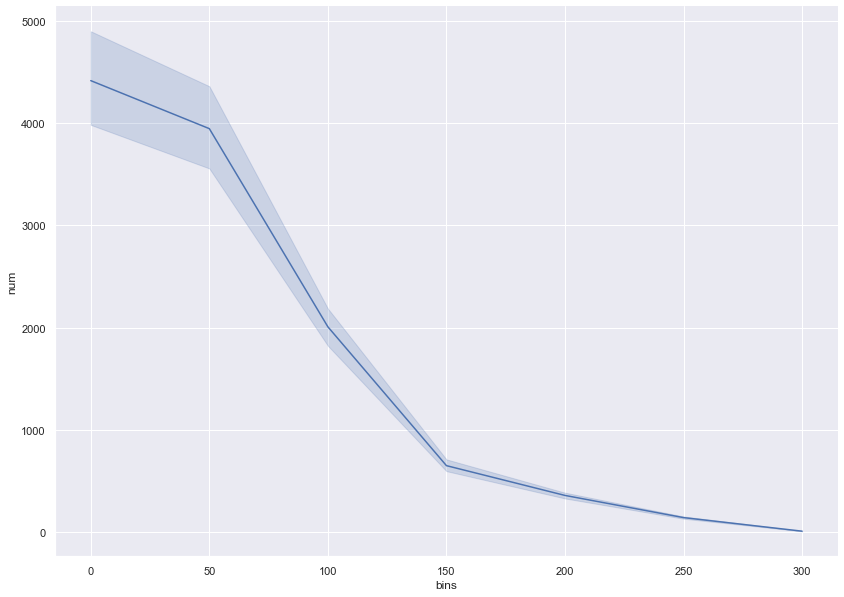

In [95]:
sns.relplot(data=df,x='bins',y='num',kind="line",palette='tab10',height=8.27, aspect=11.7/8.27)

# gmv/cost

In [400]:
data = pd.read_csv('./data/gmv_cost/gmv_cost6.csv')
data
# data['pcvr_bias'] = np.where(data['click_cnt'] > 0, data['vc_pcvr_bias'] / data['click_cnt'], 0)
# data = data[data['second_goal'] == 0]
# data[['exposure_cnt','click_cnt','real_cost_micros','gmv']].sum()
data.groupby('trace_has_click')['gmv'].agg(np.sum)

# data = data[['gid1','valid_exposure_pctr','valid_click_smart_pcvr','adjusted_smart_pcvr','exposure_cnt','click_cnt','active_num','real_cost_micros','gmv']]
data = data[['gid1','valid_exposure_pctr','adjusted_smart_pcvr','vc_adjusted_smart_pcvr2','valid_exposure_cnt','valid_click_cnt','active_num','second_active_num','real_cost_micros','gmv','second_gmv']]
data

,process_date,site_id,gid1,trace_has_click,smart_optimization_goal,second_goal,valid_exposure_cnt,valid_click_cnt,active_num,second_active_num,valid_exposure_pctr,adjusted_smart_pcvr,vc_adjusted_smart_pcvr2,real_cost_micros,gmv,second_gmv
0,20210605,30400461864295,TME,1,104,10801,0,0,70,4,0,0,0,0.00000,822.00,8.2200
1,20210605,30800591023329,TME,0,104,315,5813,339,7,30,317747454908160,47002265,54913909,212.50387,118.50,1.1850
2,20210605,20009480643972,IEG,0,104,105,19,0,0,0,190115000064,0,0,1.72000,0.00,0.0000
3,20210605,60704472578903,TME,0,104,105,3727,40,0,0,49579173053440,921158,663803,24.74298,0.00,0.0000
4,20210605,70601378118790,TME,0,104,108,34,0,0,0,428606998656,0,0,1.84000,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,20210605,10604328256510,TME,1,104,10801,0,0,62,11,0,0,0,0.00000,627.00,6.2700
1211,20210605,90505451424076,IEG,1,104,105,0,0,2,2,0,0,0,0.00000,85.31,0.8531
1212,20210605,20605460089933,IEG,1,104,0,0,0,0,0,0,0,0,0.00000,0.00,0.0000
1213,20210605,90603469797199,TME,0,104,108,174,6,0,0,2801548997184,72418,31696,1.24451,0.00,0.0000


trace_has_click
0     2657683.00
1    11906041.92
Name: gmv, dtype: float64

,gid1,valid_exposure_pctr,adjusted_smart_pcvr,vc_adjusted_smart_pcvr2,valid_exposure_cnt,valid_click_cnt,active_num,second_active_num,real_cost_micros,gmv,second_gmv
0,TME,0,0,0,0,0,70,4,0.00000,822.00,8.2200
1,TME,317747454908160,47002265,54913909,5813,339,7,30,212.50387,118.50,1.1850
2,IEG,190115000064,0,0,19,0,0,0,1.72000,0.00,0.0000
3,TME,49579173053440,921158,663803,3727,40,0,0,24.74298,0.00,0.0000
4,TME,428606998656,0,0,34,0,0,0,1.84000,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
1210,TME,0,0,0,0,0,62,11,0.00000,627.00,6.2700
1211,IEG,0,0,0,0,0,2,2,0.00000,85.31,0.8531
1212,IEG,0,0,0,0,0,0,0,0.00000,0.00,0.0000
1213,TME,2801548997184,72418,31696,174,6,0,0,1.24451,0.00,0.0000


## 看整体

In [401]:
# data = data.drop(columns = 'gid1').sum()
# data['pctr'] = data['valid_exposure_pctr'] / data['exposure_cnt'] / 1000000 /1000000
# data['ctr'] = data['click_cnt'] / data['exposure_cnt']
# data['pcvr'] = data['adjusted_smart_pcvr'] / data['click_cnt'] / 1000000
# data['smart_pcvr'] = data['valid_click_smart_pcvr'] / data['click_cnt'] / 1000000
# data['cvr'] = data['active_num'] / data['click_cnt']
# data['ctr_bias'] = data['pctr'] / data['ctr']
# data['cvr_bias'] = data['pcvr'] / data['cvr']
# data['smart_cvr_bias'] = data['smart_pcvr'] / data['cvr']
# data

data = data.drop(columns = 'gid1').sum()
data['pctr'] = data['valid_exposure_pctr'] / data['valid_exposure_cnt'] / 1000000 /1000000
data['ctr'] = data['valid_click_cnt'] / data['valid_exposure_cnt']
data['pcvr'] = data['adjusted_smart_pcvr'] / data['valid_click_cnt'] / 1000000
data['pcvr2'] = data['vc_adjusted_smart_pcvr2'] / data['valid_click_cnt'] / 1000000
data['cvr'] = data['active_num'] / data['valid_click_cnt']
data['cvr2'] = data['second_active_num'] / data['valid_click_cnt']
data['pctr_bias'] = data['pctr'] / data['ctr']
data['pcvr_bias'] = data['pcvr'] / data['cvr']
data['pcvr2_bias'] = data['pcvr2'] / data['cvr2']
data

valid_exposure_pctr        1.350351e+19
adjusted_smart_pcvr        4.797319e+11
vc_adjusted_smart_pcvr2    9.260081e+10
valid_exposure_cnt         6.018327e+08
valid_click_cnt            1.325153e+07
active_num                 5.041040e+05
second_active_num          1.084100e+05
real_cost_micros           9.870765e+06
gmv                        1.456372e+07
second_gmv                 1.009038e+05
pctr                       2.243732e-02
ctr                        2.201863e-02
pcvr                       3.620199e-02
pcvr2                      6.987932e-03
cvr                        3.804118e-02
cvr2                       8.180940e-03
pctr_bias                  1.019015e+00
pcvr_bias                  9.516526e-01
pcvr2_bias                 8.541722e-01
dtype: float64

## 看gid

In [387]:
data_gid = data.groupby('gid1').agg(np.sum)
# data_gid['pctr'] = data_gid['valid_exposure_pctr'] / data_gid['exposure_cnt'] / 1000000 /1000000
# data_gid['ctr'] = data_gid['click_cnt'] / data_gid['exposure_cnt']
# data_gid['pcvr'] = data_gid['adjusted_smart_pcvr'] / data_gid['click_cnt'] / 1000000
# data_gid['cvr'] = data_gid['active_num'] / data_gid['click_cnt']
# data_gid['ctr_bias'] = data_gid['pctr'] / data_gid['ctr']
# data_gid['cvr_bias'] = data_gid['pcvr'] / data_gid['cvr']
data_gid

,valid_exposure_pctr,adjusted_smart_pcvr,vc_adjusted_smart_pcvr2,valid_exposure_cnt,valid_click_cnt,active_num,real_cost_micros,gmv
gid1,,,,,,,,
CSIG,100992584514951360,4869815337,453374,2244748,93429,4717,8.358182e+04,74858.24
IEG,102267269736557504,5617720699,2070385,7619115,91540,5017,1.660371e+05,133384.23
QQ系,2571068203007354368,53428700160,19190819,75565556,2550083,67065,1.094775e+06,1212256.94
TKD,3795421054697830912,117648979664,10630631,221791731,3754212,136584,2.665058e+06,2741894.94
TME,601615425318228992,16237986847,313898,20660028,580226,14360,2.769216e+05,224383.43
其他,375523769986496,14125283,0,20177,353,5,6.192275e+02,296.03
应用宝,2066986738991744,554269579,0,38296,2326,401,7.727000e+03,4970.96
未分组1,13584847028581376,915172346,1533,1238057,13318,801,2.333796e+04,18490.13
阅文系,308295471086353024,7582212077,20726,6973723,308380,6340,9.914302e+04,75859.95


In [314]:
data.sort_value('real_cost_micros',ascending=False)

AttributeError: 'DataFrame' object has no attribute 'sort_value'

In [308]:
data['pcvr_bias'].mean()

52.105173278011854

In [309]:
data[data['vc_pcvr_bias']>1]

,process_date,site_id,gid1,trace_has_click,smart_optimization_goal,second_goal,vc_pcvr_bias,exposure_cnt,click_cnt,trace_cnt,active_num,real_cost_micros,gmv,pcvr_bias
1,20210605,60402262989318,CSIG,0,104,108,5.557065e+01,2223,56,0,0,37.02836,0.00,0.992333
2,20210605,40301325569554,TME,0,405,402,3.000000e+00,152,3,0,0,3.73372,0.00,1.000000
9,20210605,40706426556602,QQ系,0,108,0,1.163158e+04,182311,8951,1560,0,2697.57125,0.00,1.299472
10,20210605,30800591023329,TME,0,104,10801,3.764933e+03,32891,749,259,0,696.69095,0.00,5.026613
16,20210605,50104416453989,未分组1,0,104,10801,8.000000e+00,1370,8,4,1,332.61000,388.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,20210605,60304476255988,未分组1,0,105,204,2.000000e+00,12,2,0,0,1.39000,0.00,1.000000
4852,20210605,50604428212896,TKD,0,10801,0,2.655396e+06,14488362,71624,1986157,24,89542.10678,14667.52,37.074112
4854,20210605,70608348419857,IEG,0,205,0,2.838474e+02,1918,94,0,0,625.27150,0.00,3.019653
4856,20210605,40903398619789,TME,0,104,0,9.118294e+04,2584957,64966,2942,9,19059.46580,242.85,1.403549


# gmv_cost union

In [435]:
data = pd.read_csv('./data/gmv_cost/gmv_cost6.csv')
data

data = data[['site_id','position_id','valid_exposure_pctr','adjusted_smart_pcvr','vc_adjusted_smart_pcvr2','valid_exposure_cnt','valid_click_cnt','active_num','second_active_num','real_cost_micros','first_gmv','second_gmv','click_gmv','no_click_gmv']]
data = data.groupby(['site_id','position_id']).agg(np.sum).reset_index(drop=True)
data
data = data.agg(np.sum)
data

,process_date,site_id,position_id,smart_optimization_goal,second_goal,valid_exposure_cnt,valid_click_cnt,active_num,second_active_num,valid_exposure_pctr,adjusted_smart_pcvr,vc_adjusted_smart_pcvr2,real_cost_micros,first_gmv,second_gmv,gmv


""


Series([], dtype: float64)

In [420]:
data['gmv'] = data['first_gmv'] + data['second_gmv']
data['gmv_click'] = data['click_gmv'] + data['no_click_gmv']
data['gmv/cost'] = data['gmv'] / data['real_cost_micros']
data['pctr'] = data['valid_exposure_pctr'] / data['valid_exposure_cnt'] / 1000000 /1000000
data['ctr'] = data['valid_click_cnt'] / data['valid_exposure_cnt']
data['pcvr'] = data['adjusted_smart_pcvr'] / data['valid_click_cnt'] / 1000000
data['pcvr2'] = data['vc_adjusted_smart_pcvr2'] / data['valid_click_cnt'] / 1000000
data['cvr'] = data['active_num'] / data['valid_click_cnt']
data['cvr2'] = data['second_active_num'] / data['valid_click_cnt']
data['pctr_bias'] = data['pctr'] / data['ctr']
data['pcvr_bias'] = data['pcvr'] / data['cvr']
data['pcvr2_bias'] = data['pcvr2'] / data['cvr2']
data

valid_exposure_pctr        2.972436e+19
adjusted_smart_pcvr        3.707846e+12
vc_adjusted_smart_pcvr2    9.670548e+10
valid_exposure_cnt         1.476311e+09
valid_click_cnt            2.938760e+07
active_num                 2.690316e+06
second_active_num          1.132470e+05
real_cost_micros           2.500173e+07
first_gmv                  1.880200e+07
second_gmv                 1.234136e+07
click_gmv                  2.525924e+07
no_click_gmv               5.884111e+06
gmv                        3.114336e+07
gmv_click                  3.114336e+07
gmv/cost                   1.245648e+00
pctr                       2.013421e-02
ctr                        1.990610e-02
pcvr                       1.261704e-01
pcvr2                      3.290690e-03
cvr                        9.154596e-02
cvr2                       3.853564e-03
pctr_bias                  1.011459e+00
pcvr_bias                  1.378220e+00
pcvr2_bias                 8.539342e-01
dtype: float64

# gmv_cost case

In [463]:
data = pd.read_csv('./data/gmv_cost/gmv_cost10.csv')
data


data = data[['site_id','position_id','valid_exposure_pctr','adjusted_smart_pcvr','vc_adjusted_smart_pcvr2','valid_exposure_cnt','valid_click_cnt','active_num','second_active_num','real_cost_micros','first_gmv','second_gmv','gmv']]
data = data.groupby(['site_id','position_id']).agg(np.sum).reset_index(drop=True)
data
data = data.agg(np.sum)
data

,process_date,site_id,position_id,smart_optimization_goal,second_goal,valid_exposure_cnt,valid_click_cnt,active_num,second_active_num,valid_exposure_pctr,adjusted_smart_pcvr,vc_adjusted_smart_pcvr2,real_cost_micros,first_gmv,second_gmv,gmv
0,20210605,60005012352827,8060991538240800,104,315,2942,486,62,64,484076192626688,70678444,85964957,574.77000,0.0,256.0,256.0
1,20210605,20201368893836,3040440804494903,104,315,14,0,0,0,137897000448,0,0,0.22413,0.0,0.0,0.0
2,20210605,30602476557982,6011715618083900,104,315,23,2,0,0,2468298989568,219456,178887,1.93000,0.0,0.0,0.0
3,20210605,50604428212896,6021031581415096,104,315,14,0,0,0,593991006208,0,0,0.78931,0.0,0.0,0.0
4,20210605,60304476255988,7031328262230145,104,315,1,0,0,0,81530003456,0,0,0.30000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,20210605,60402262989318,4011608449932965,104,315,4985,185,32,35,300624191826944,21375543,29922848,118.23147,0.0,140.0,140.0
284,20210605,60608308136142,5051101671195074,104,315,6838,65,18,17,64562421004544,14236181,17926382,123.20595,0.0,68.0,68.0
285,20210605,70908422871965,7030798318622912,104,315,1,0,0,0,25304999936,0,0,0.07548,0.0,0.0,0.0
286,20210605,70707452477964,9051127424508558,104,315,27,1,0,0,579652999680,47739,369088,1.13809,0.0,0.0,0.0


,valid_exposure_pctr,adjusted_smart_pcvr,vc_adjusted_smart_pcvr2,valid_exposure_cnt,valid_click_cnt,active_num,second_active_num,real_cost_micros,first_gmv,second_gmv,gmv
0,61054002176,0,0,3,0,0,0,0.06326,0.0,0.0,0.0
1,122532001472,0,0,7,0,1,1,0.21978,0.0,4.0,4.0
2,14274670016192,4040347,5089044,1159,13,3,2,26.62631,0.0,8.0,8.0
3,222298003904,0,0,17,0,0,0,0.33640,0.0,0.0,0.0
4,2494697985792,491873,652997,37,4,0,0,4.06485,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
283,305816000000,677228,839819,19,1,1,1,0.94439,0.0,4.0,4.0
284,33644954993664,8244828,10577764,1048,50,8,11,35.12336,0.0,44.0,44.0
285,56247001088,0,0,1,0,0,0,0.17000,0.0,0.0,0.0
286,698445001152,0,0,101,0,0,0,2.47000,0.0,0.0,0.0


valid_exposure_pctr        3.304993e+16
adjusted_smart_pcvr        4.908201e+09
vc_adjusted_smart_pcvr2    6.167936e+09
valid_exposure_cnt         2.025296e+06
valid_click_cnt            3.125300e+04
active_num                 5.799000e+03
second_active_num          1.993000e+04
real_cost_micros           4.049902e+04
first_gmv                  0.000000e+00
second_gmv                 7.972000e+04
gmv                        7.972000e+04
dtype: float64

In [464]:
data['gmv/cost'] = data['gmv'] / data['real_cost_micros']
data['pctr'] = data['valid_exposure_pctr'] / data['valid_exposure_cnt'] / 1000000 /1000000
data['ctr'] = data['valid_click_cnt'] / data['valid_exposure_cnt']
data['pcvr'] = data['adjusted_smart_pcvr'] / data['valid_click_cnt'] / 1000000
data['pcvr2'] = data['vc_adjusted_smart_pcvr2'] / data['valid_click_cnt'] / 1000000
data['cvr'] = data['active_num'] / data['valid_click_cnt']
data['cvr2'] = data['second_active_num'] / data['valid_click_cnt']
data['pctr_bias'] = data['pctr'] / data['ctr']
data['pcvr_bias'] = data['pcvr'] / data['cvr']
data['pcvr2_bias'] = data['pcvr2'] / data['cvr2']
data

valid_exposure_pctr        3.304993e+16
adjusted_smart_pcvr        4.908201e+09
vc_adjusted_smart_pcvr2    6.167936e+09
valid_exposure_cnt         2.025296e+06
valid_click_cnt            3.125300e+04
active_num                 5.799000e+03
second_active_num          1.993000e+04
real_cost_micros           4.049902e+04
first_gmv                  0.000000e+00
second_gmv                 7.972000e+04
gmv                        7.972000e+04
gmv/cost                   1.968443e+00
pctr                       1.631857e-02
ctr                        1.543132e-02
pcvr                       1.570474e-01
pcvr2                      1.973550e-01
cvr                        1.855502e-01
cvr2                       6.376988e-01
pctr_bias                  1.057496e+00
pcvr_bias                  8.463876e-01
pcvr2_bias                 3.094800e-01
dtype: float64

# pcvr calibration

## 读取并校验数据

In [266]:
data_origin = pd.read_csv('./data/pcvr_calibration/exp_optimize_inner_jion.csv')
# data_origin.loc[data_origin['click_cnt']=='\\N','click_cnt'] = 0
# data_origin['click_cnt'] = data_origin['click_cnt'].astype('int')
data = data_origin[['exp_id','original_pcvr','adjusted_pcvr','impression','click','conversion','click_cnt']]

data_groupby_exp = data.groupby('exp_id').agg(np.sum)
data_groupby_exp

,original_pcvr,adjusted_pcvr,impression,click,conversion,click_cnt
exp_id,,,,,,
152954,74253006609,74540584711,100398413,1903297,76415,41453456
152956,74099078871,74416969818,100492958,1898098,76301,41454177
152958,74769712008,75939287138,101338880,1914173,76549,41453785
152962,74978337310,77373116659,103356080,1937782,78300,41450984
152964,74433730791,74780097181,100546970,1904282,76430,41451861


In [261]:
data_groupby_exp['avg_pcvr'] = data_groupby_exp['adjusted_pcvr'] / data_groupby_exp['click'] / 1000000
data_groupby_exp['cvr'] = data_groupby_exp['conversion'] / data_groupby_exp['click']
data_groupby_exp['bias'] = data_groupby_exp['avg_pcvr'] / data_groupby_exp['cvr']
data_groupby_exp

,original_pcvr,adjusted_pcvr,impression,click,conversion,click_cnt,avg_pcvr,cvr,bias
exp_id,,,,,,,,,
152954,74253006609,74540584711,100398413,1903297,76415,41453456,0.039164,0.040149,0.975471
152956,74099078871,74416969818,100492958,1898098,76301,41454177,0.039206,0.040199,0.975308
152958,74769712008,75939287138,101338880,1914173,76549,41453785,0.039672,0.039991,0.992035
152962,74978337310,77373116659,103356080,1937782,78300,41450984,0.039929,0.040407,0.988162
152964,74433730791,74780097181,100546970,1904282,76430,41451861,0.039269,0.040136,0.978413


## 查看单个ad

In [206]:
#  data_origin.head(50)
data_ad = data_origin[data_origin['ad_id']==3337933691]
data_ad.groupby('exp_id').agg('sum')

,ad_id,impression,click,conversion,conversion_second,real_cost,real_cost_with_contract,gmv,gmv_second,pctr,pcvr,pcvr_second,original_pcvr,original_pcvr_second,adjusted_pcvr,adjusted_pcvr_second
exp_id,,,,,,,,,,,,,,,,
152954,3337933691,608122,6947,482,0,10998200000,10998200000,11568000000,11568000000,6721091203025984,303021635,0,65460230,0,303198070,0
152956,3337933691,605733,6833,498,0,10743850000,10743850000,11952000000,11952000000,6633648847927488,301487194,0,64063085,0,302293512,0
152958,3337933691,566914,6231,431,0,9471670000,9471670000,10344000000,10344000000,6175748648925376,166385785,0,58885438,0,262840634,0
152962,3337933691,738416,7932,532,0,13412230000,13412230000,12768000000,12768000000,7839452470255936,224713499,0,69770911,0,392975321,0
152964,3337933691,608304,6668,493,0,10044840000,10044840000,11832000000,11832000000,6642025666608384,179178119,0,60753373,0,286550410,0


## click分桶统计

In [254]:
bins =  np.arange(0, 300, 10)
bins = np.append(bins, 9999999999)
label = np.arange(0, 300, 10)

data = data[['exp_id','original_pcvr','adjusted_pcvr','click','conversion','click_cnt']]
data = data.groupby(['exp_id', pd.cut(data['click_cnt'],bins,labels=label)]).agg(np.sum)
data.columns = [x+"_sum" for x in data.columns.ravel()]
data.reset_index(inplace=True)
data

,exp_id,click_cnt,original_pcvr_sum,adjusted_pcvr_sum,click_sum,conversion_sum,click_cnt_sum
0,152954,0,1749013171,1739561882,18127,819,354165
1,152954,10,999303546,989313334,13206,649,277850
2,152954,20,798913438,789357117,11327,612,231422
3,152954,30,624589683,616515140,10016,450,208515
4,152954,40,563360328,555037820,9630,412,198236
5,152954,50,481998336,472106982,9436,388,197700
6,152954,60,461435747,450979735,9189,333,192637
7,152954,70,419679361,409864873,8888,329,186927
8,152954,80,400189766,389383704,8368,310,174927
9,152954,90,384089820,371229923,7709,298,163162


In [256]:
data['avg_pcvr'] = data['adjusted_pcvr_sum'] / data['click_sum']/ 1000000
data['cvr'] = data['conversion_sum'] / data['click_sum']
data['bias'] = data['avg_pcvr'] / data['cvr']
data['ratio'] = data['adjusted_pcvr_sum'] / data['original_pcvr_sum']
data

,exp_id,click_cnt,original_pcvr_sum,adjusted_pcvr_sum,click_sum,conversion_sum,click_cnt_sum,avg_pcvr,cvr,bias,ratio
0,152954,0,1749013171,1739561882,18127,819,354165,0.095965,0.045181,2.124007,0.994596
1,152954,10,999303546,989313334,13206,649,277850,0.074914,0.049144,1.524366,0.990003
2,152954,20,798913438,789357117,11327,612,231422,0.069688,0.054030,1.289799,0.988038
3,152954,30,624589683,616515140,10016,450,208515,0.061553,0.044928,1.370034,0.987072
4,152954,40,563360328,555037820,9630,412,198236,0.057636,0.042783,1.347179,0.985227
5,152954,50,481998336,472106982,9436,388,197700,0.050033,0.041119,1.216771,0.979478
6,152954,60,461435747,450979735,9189,333,192637,0.049078,0.036239,1.354293,0.977340
7,152954,70,419679361,409864873,8888,329,186927,0.046114,0.037016,1.245790,0.976614
8,152954,80,400189766,389383704,8368,310,174927,0.046532,0.037046,1.256076,0.972998
9,152954,90,384089820,371229923,7709,298,163162,0.048155,0.038656,1.245738,0.966519


In [257]:
data1 = data[data['exp_id'].isin([152954,152958,152962,152964])]
# data1 = data[data['exp_id'].isin([152954,152964])]
# data1 = data[data['exp_id'].isin([152954,152958])]
data1


,exp_id,click_cnt,original_pcvr_sum,adjusted_pcvr_sum,click_sum,conversion_sum,click_cnt_sum,avg_pcvr,cvr,bias,ratio
0,152954,0,1749013171,1739561882,18127,819,354165,0.095965,0.045181,2.124007,0.994596
1,152954,10,999303546,989313334,13206,649,277850,0.074914,0.049144,1.524366,0.990003
2,152954,20,798913438,789357117,11327,612,231422,0.069688,0.054030,1.289799,0.988038
3,152954,30,624589683,616515140,10016,450,208515,0.061553,0.044928,1.370034,0.987072
4,152954,40,563360328,555037820,9630,412,198236,0.057636,0.042783,1.347179,0.985227
5,152954,50,481998336,472106982,9436,388,197700,0.050033,0.041119,1.216771,0.979478
6,152954,60,461435747,450979735,9189,333,192637,0.049078,0.036239,1.354293,0.977340
7,152954,70,419679361,409864873,8888,329,186927,0.046114,0.037016,1.245790,0.976614
8,152954,80,400189766,389383704,8368,310,174927,0.046532,0.037046,1.256076,0.972998
9,152954,90,384089820,371229923,7709,298,163162,0.048155,0.038656,1.245738,0.966519


## bias画图

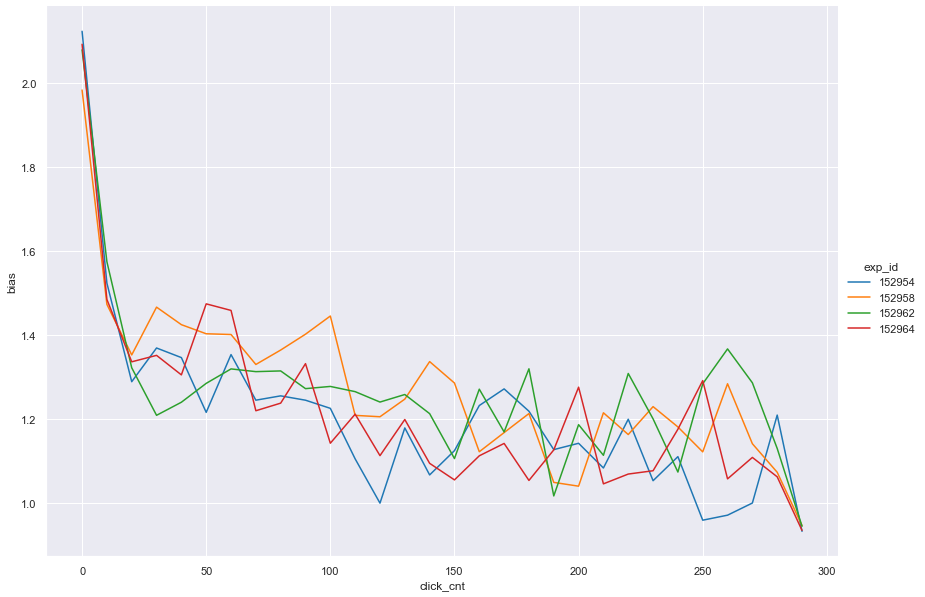

In [258]:
# sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.relplot(data=data1,x='click_cnt',y='bias',hue='exp_id',kind="line",palette='tab10',height=8.27, aspect=11.7/8.27)

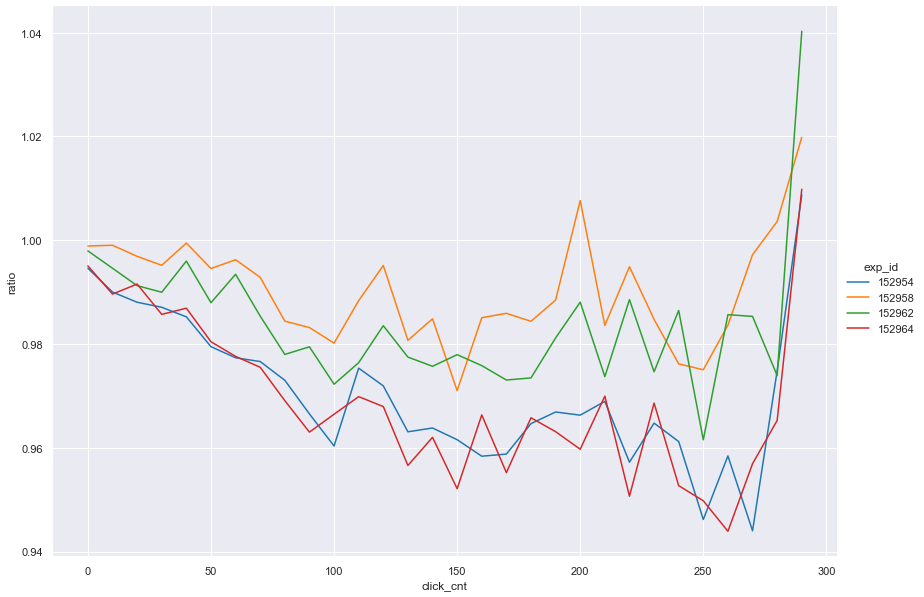

In [259]:
sns.relplot(data=data1,x='click_cnt',y='ratio',hue='exp_id',kind="line",palette='tab10',height=8.27, aspect=11.7/8.27)

# repeated_exposure_bias

## 读取

In [191]:
# data.to_csv('sort_pcxr_and_cxr.csv',index=False)
data = pd.read_csv('./data/repeated_exposure_bias/pcxr_and_cxr4.csv')
data.sort_values(by=['order'], inplace=True)

data['ctr'] = data['click_cnt'] / data['exposure_cnt']
data['pctr_1'] = data['pctr'] / data['exposure_cnt']
data['ctr_bias_1'] = data['pctr_1']/data['ctr'] - 1

data['site_name'] = data['site_id'].apply(lambda x: 'view' if x==70506421868294 else 'browser')
data['view_exposure_sum'] = data[data['site_name']=='view']['exposure_cnt'].sum()
data['browser_exposure_sum'] = data[data['site_name']=='browser']['exposure_cnt'].sum()

data.loc[data['site_name']=='view','exposure_ratio'] = data['exposure_cnt'] / data['view_exposure_sum']
data.loc[data['site_name']=='browser','exposure_ratio'] = data['exposure_cnt'] / data['browser_exposure_sum']
data
data.info()

,site_id,order,pctr,click_cnt,exposure_cnt,ctr_bias,ctr,pctr_1,ctr_bias_1,site_name,view_exposure_sum,browser_exposure_sum,exposure_ratio
0,70702022115052,0,164857.252119,177391,11499608,-0.070656,0.015426,0.014336,-0.070656,browser,83237086,23973463,0.479681
8,70506421868294,0,620307.329233,656535,38954111,-0.055180,0.016854,0.015924,-0.055180,view,83237086,23973463,0.467990
1,70702022115052,1,148825.707693,135280,11497612,0.100131,0.011766,0.012944,0.100131,browser,83237086,23973463,0.479597
3,70506421868294,1,569692.969071,500598,38945519,0.138025,0.012854,0.014628,0.138025,view,83237086,23973463,0.467887
4,70506421868294,2,71568.222009,61836,4795262,0.157388,0.012895,0.014925,0.157388,view,83237086,23973463,0.057610
6,70702022115052,2,12133.231601,11126,881379,0.090530,0.012623,0.013766,0.090530,browser,83237086,23973463,0.036765
5,70506421868294,3,7253.531603,6142,507486,0.180972,0.012103,0.014293,0.180972,view,83237086,23973463,0.006097
7,70702022115052,3,1540.592817,1463,81234,0.053037,0.018010,0.018965,0.053037,browser,83237086,23973463,0.003388
2,70702022115052,4,416.806443,408,13630,0.021584,0.029934,0.030580,0.021584,browser,83237086,23973463,0.000569
9,70506421868294,4,456.517888,418,34708,0.092148,0.012043,0.013153,0.092148,view,83237086,23973463,0.000417


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site_id               10 non-null     int64  
 1   order                 10 non-null     int64  
 2   pctr                  10 non-null     float64
 3   click_cnt             10 non-null     int64  
 4   exposure_cnt          10 non-null     int64  
 5   ctr_bias              10 non-null     float64
 6   ctr                   10 non-null     float64
 7   pctr_1                10 non-null     float64
 8   ctr_bias_1            10 non-null     float64
 9   site_name             10 non-null     object 
 10  view_exposure_sum     10 non-null     int64  
 11  browser_exposure_sum  10 non-null     int64  
 12  exposure_ratio        10 non-null     float64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.4+ KB


## 画图

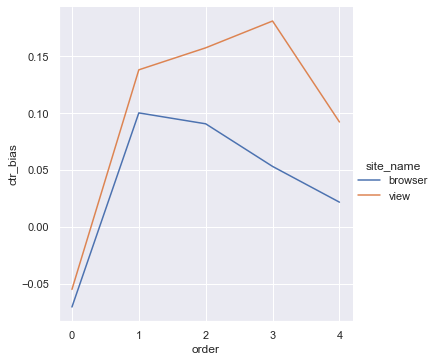

In [170]:
sns.relplot(data=data,x='order',y='ctr_bias',hue='site_name',kind="line")

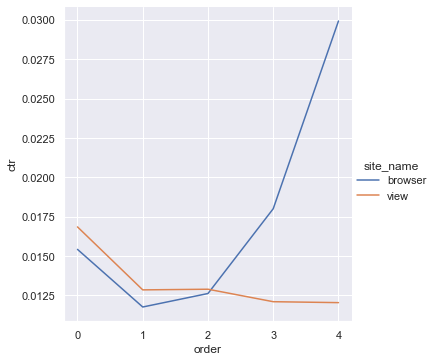

In [171]:
sns.relplot(data=data,x='order',y='ctr',hue='site_name',kind="line")

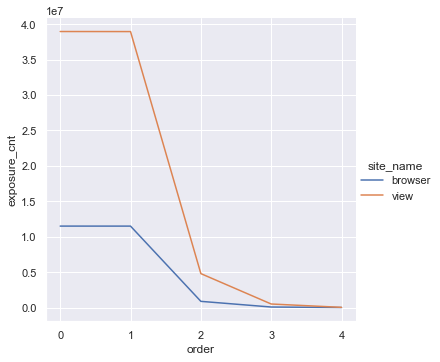

In [179]:
g = sns.relplot(data=data,x='order',y='exposure_cnt',hue='site_name',kind="line")
g.set(xticks=range(0,5))

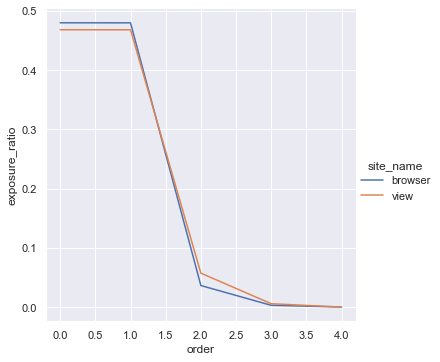

In [174]:
g = sns.relplot(data=data,x='order',y='exposure_ratio',hue='site_name',kind="line")

# for i in range(10):
#     g.text(i, data[])

In [188]:
exposure_cnt = data[['site_name','order','exposure_cnt','exposure_ratio','view_exposure_sum','browser_exposure_sum']]
exposure_cnt
exposure_cnt[exposure_cnt['site_name']=='view']
exposure_cnt[exposure_cnt['site_name']=='browser']

,site_name,order,exposure_cnt,exposure_ratio,view_exposure_sum,browser_exposure_sum
15,view,0,57119509,0.431404,132403834,40408436
8,browser,0,18510526,0.458086,132403834,40408436
3,view,1,57106555,0.431306,132403834,40408436
16,browser,1,18507348,0.458007,132403834,40408436
9,browser,2,2759730,0.068296,132403834,40408436
2,view,2,13525149,0.102151,132403834,40408436
5,browser,3,492455,0.012187,132403834,40408436
10,view,3,3516737,0.026561,132403834,40408436
1,view,4,876517,0.006620,132403834,40408436
13,browser,4,97781,0.002420,132403834,40408436


,site_name,order,exposure_cnt,exposure_ratio,view_exposure_sum,browser_exposure_sum
15,view,0,57119509,0.431404,132403834,40408436
3,view,1,57106555,0.431306,132403834,40408436
2,view,2,13525149,0.102151,132403834,40408436
10,view,3,3516737,0.026561,132403834,40408436
1,view,4,876517,0.006620,132403834,40408436
18,view,5,203416,0.001536,132403834,40408436
11,view,6,44796,0.000338,132403834,40408436
17,view,7,9147,0.000069,132403834,40408436
14,view,8,1775,0.000013,132403834,40408436
0,view,9,233,0.000002,132403834,40408436


,site_name,order,exposure_cnt,exposure_ratio,view_exposure_sum,browser_exposure_sum
8,browser,0,18510526,0.458086,132403834,40408436
16,browser,1,18507348,0.458007,132403834,40408436
9,browser,2,2759730,0.068296,132403834,40408436
5,browser,3,492455,0.012187,132403834,40408436
13,browser,4,97781,0.002420,132403834,40408436
19,browser,5,23631,0.000585,132403834,40408436
6,browser,6,8404,0.000208,132403834,40408436
12,browser,7,4206,0.000104,132403834,40408436
7,browser,8,2578,0.000064,132403834,40408436
4,browser,9,1777,0.000044,132403834,40408436


## 保存

In [52]:
data.to_csv('sort_pcxr_and_cxr.csv',index=False)